# Tutorial for Cancer-Biomarkers-from-Clinical-Data

## 1. Data loading and preprocessing

### 1.1. Import the necessary modules

In [1]:
# Library imports
import matplotlib.pyplot as plt

# Add the path to the src folder
import sys
sys.path.append('src')

# Import data preprocessing functions
from data_preprocessing import load_data, feature_label_split

### 1.2. Load the data

In [2]:
categories, dfs = load_data('data/clinical_cancer_data.xlsx')

list(enumerate(categories))

[(0, 'Breast'),
 (1, 'Colorectum'),
 (2, 'Esophagus'),
 (3, 'Liver'),
 (4, 'Lung'),
 (5, 'Normal'),
 (6, 'Ovary'),
 (7, 'Pancreas'),
 (8, 'Stomach')]

## 2. Random forest model

In [4]:
from random_forest_model import rf_normal_cancers, plot_important_biomarkers

In [5]:
important_biomarkers_normal_ovary = rf_normal_cancers(categories = categories, 
                                                      dfs = dfs, 
                                                      cancer1_category_index = 6, 
                                                      iterations = 100,
                                                      threshold = 0.05)

Random forest classification: Normal + Ovary

Average Accuracy over 100 iterations: 0.9614

Biomarkers with Importance >= 0.05:
     Biomarker  Importance
3      CA-125     0.159995
29  Prolactin     0.109398
18       IL-6     0.099734
35       TGFa     0.094122
31       sFas     0.075817


In [6]:
important_biomarkers_normal_pancreas = rf_normal_cancers(categories = categories, 
                                                         dfs = dfs, 
                                                         cancer1_category_index = 7, 
                                                         iterations = 100, 
                                                         threshold = 0.05)

Random forest classification: Normal + Pancreas

Average Accuracy over 100 iterations: 0.9389

Biomarkers with Importance >= 0.05:
               Biomarker  Importance
5                CA19-9     0.142069
19                 IL-8     0.094102
18                 IL-6     0.080587
33  sHER2/sEGFR2/sErbB2     0.077110
27                  OPN     0.060258
15                GDF15     0.057668
23              Midkine     0.050770


In [7]:
important_biomarkers_normal_ovary_pancreas = rf_normal_cancers(categories = categories, 
                                                               dfs = dfs, 
                                                               cancer1_category_index = 6, 
                                                               cancer2_category_index = 7, 
                                                               iterations = 100, 
                                                               threshold = 0.05)

Random forest classification: Normal + Ovary + Pancreas

Average Accuracy over 100 iterations: 0.9112

Biomarkers with Importance >= 0.05:
               Biomarker  Importance
3                CA-125     0.096122
33  sHER2/sEGFR2/sErbB2     0.080629
18                 IL-6     0.068114
31                 sFas     0.064917
5                CA19-9     0.059329
29            Prolactin     0.056096


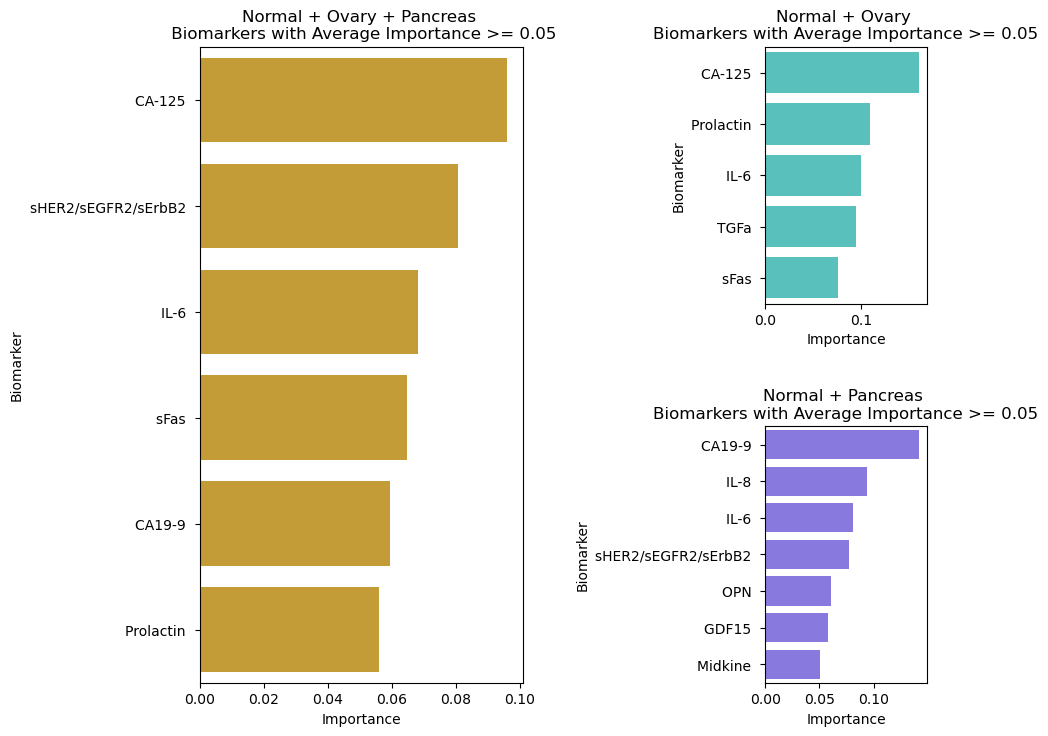

In [10]:
fig = plt.figure(figsize=(10, 8))
grid = plt.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1])

ax1 = plt.subplot(grid[:, 0])
ax2 = plt.subplot(grid[0, 1])
ax3 = plt.subplot(grid[1, 1])

plot_important_biomarkers(important_biomarkers = important_biomarkers_normal_ovary_pancreas,
                          datasets = ['Normal', 'Ovary', 'Pancreas'],
                          threshold = 0.05,
                          color = 'goldenrod',
                          ax = ax1)

plot_important_biomarkers(important_biomarkers = important_biomarkers_normal_ovary,
                          datasets = ['Normal', 'Ovary'],
                          threshold = 0.05,
                          color = 'mediumturquoise',
                          ax = ax2)

plot_important_biomarkers(important_biomarkers = important_biomarkers_normal_pancreas,
                          datasets = ['Normal', 'Pancreas'],
                          threshold = 0.05,
                          color = 'mediumslateblue',
                          ax = ax3)

fig.tight_layout(pad=3.0)
plt.show()